In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
#import json
#import datetime
import seaborn as sns
#import matplotlib as mlp
import matplotlib.pyplot as plt
#from datetime import datetime
#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder, StandardScaler
#from sklearn.metrics import r2_score
#from sklearn.linear_model import LinearRegression

# import dataset
dfPhiladelphia = pd.read_csv("data/tmp/dfPhiladelphia.csv.zip")
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733441 entries, 0 to 733440
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   start_date                              733441 non-null  object 
 1   end_date                                733441 non-null  object 
 2   start_time_hourly                       733441 non-null  int64  
 3   end_time_hourly                         733441 non-null  int64  
 4   start_station_id                        733441 non-null  int64  
 5   end_station_id                          733441 non-null  int64  
 6   bike_id                                 733441 non-null  int64  
 7   start_latitude                          733441 non-null  float64
 8   start_longitude                         733441 non-null  float64
 9   end_latitude                            733441 non-null  float64
 10  end_longitude                           7334

# 2. Descriptive Analytics

In [2]:
palette = "Spectral"

## 2.1 Temporal Demand Patterns and Seasonality

In this section, we will:
- Demonstrate how fleet usage varies during a day, a week and the year. 
- What patterns do you observe? Explain.

In [3]:
#dfPhiladelphia.mean()

In [4]:
#dfPhiladelphia["numOfRentedBikes"].describe()

### 2.1.1 Fleet usage variety per day

In [5]:
######## ((MAYBE ALSO FOR Percentage of used bikes))

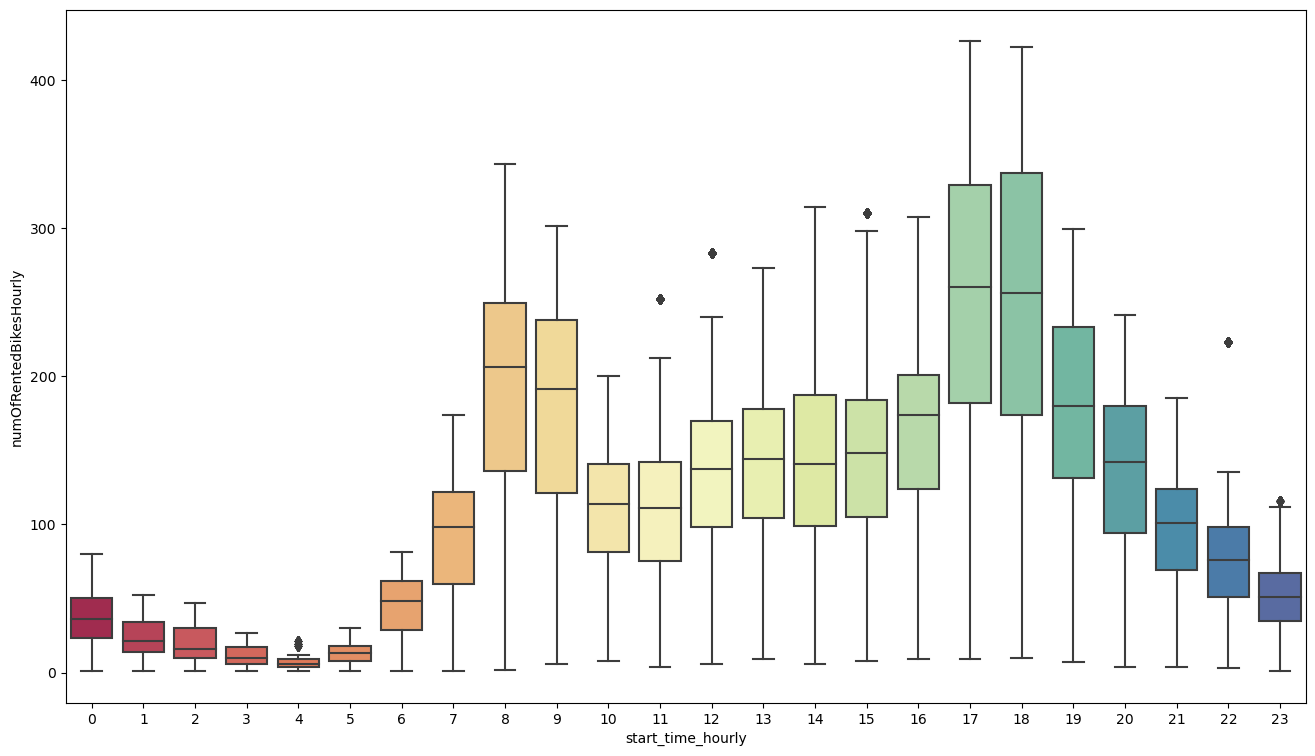

In [6]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- Tagsüber () wird mehr ausgeliehen, als Nachts ()
- 17-18 und 8-9 scheint was zu sein, vlt. Berufsverkehr? Wir werden uns das anscvhauen :D

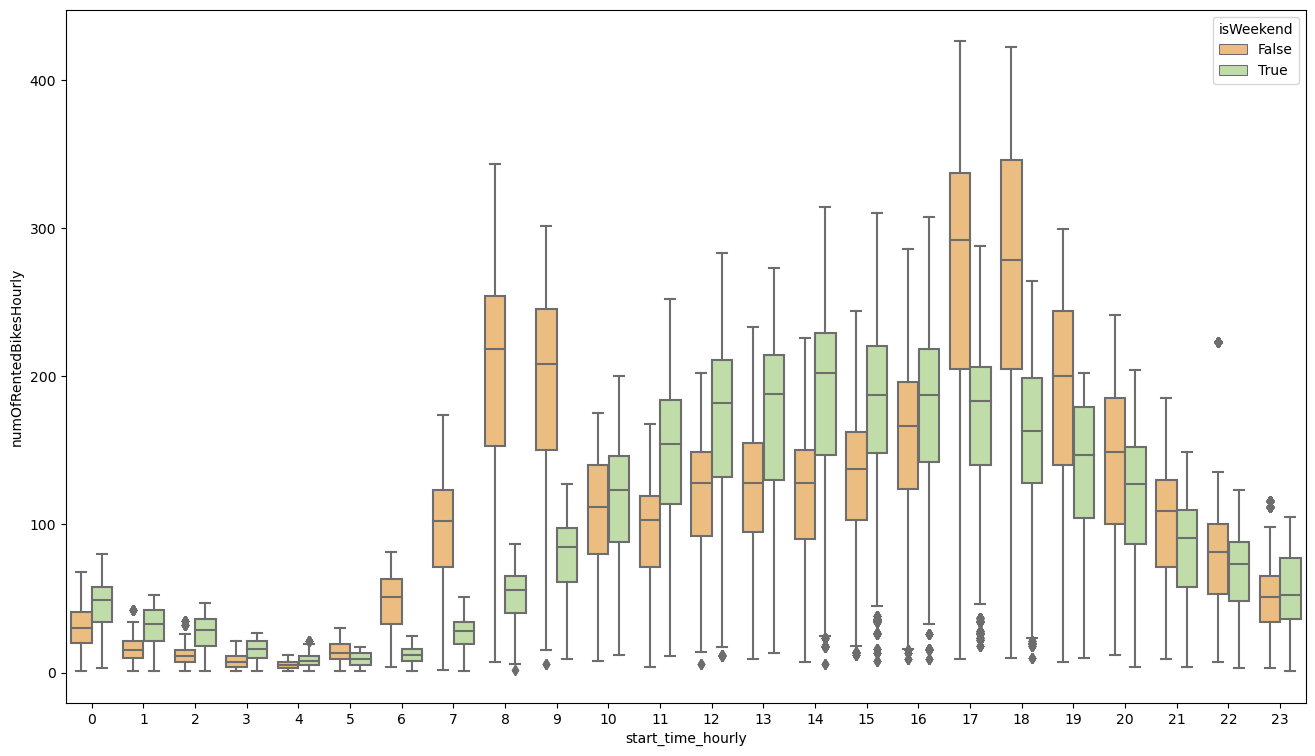

In [7]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isWeekend")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- In this graph we observe a rise in Fahradleih zum Berufsverkehr (isWeekend = False) zu den Zeiten 6,7,8,9,17,18
- Am Wochenende (isWeekend = True) ist generell am Tag 11 bis 16/17 Uhr mehr verleih (Mehr Freizeit)
- Partyfahrer Nachts am Wochende?? -> Next plot

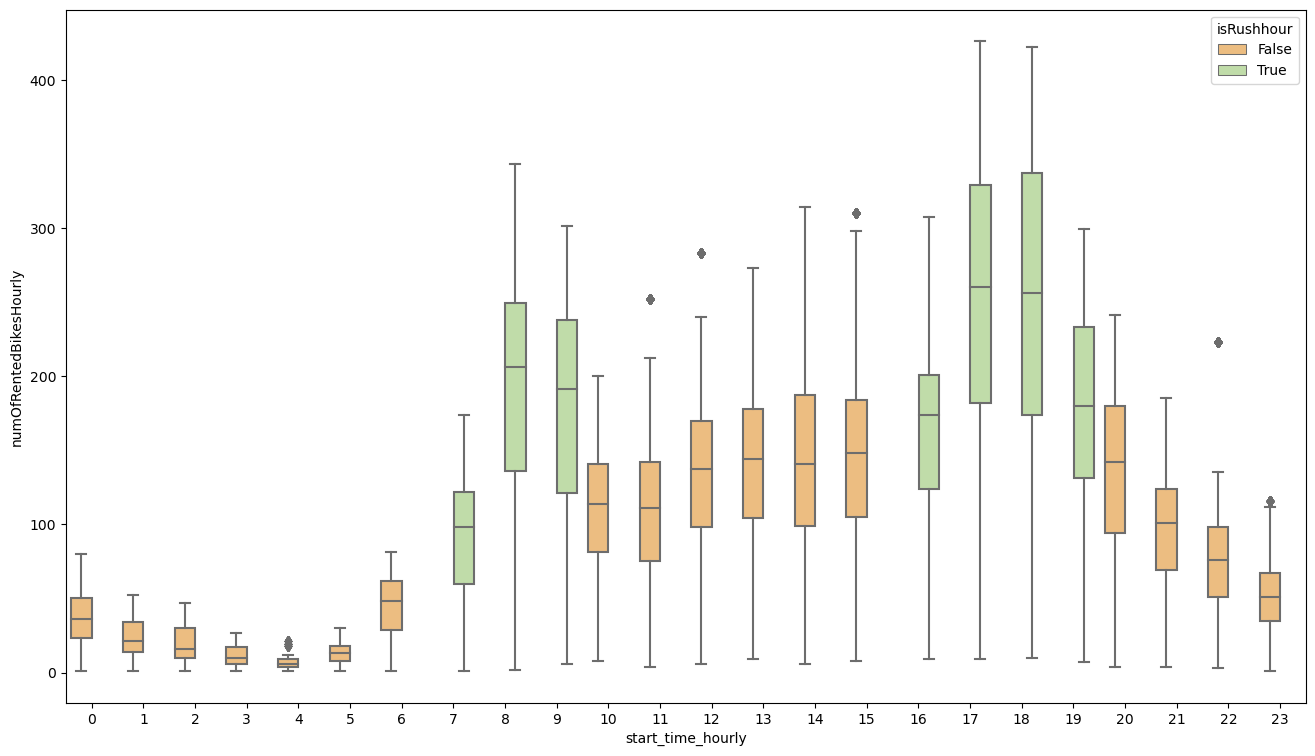

In [8]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isRushhour")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

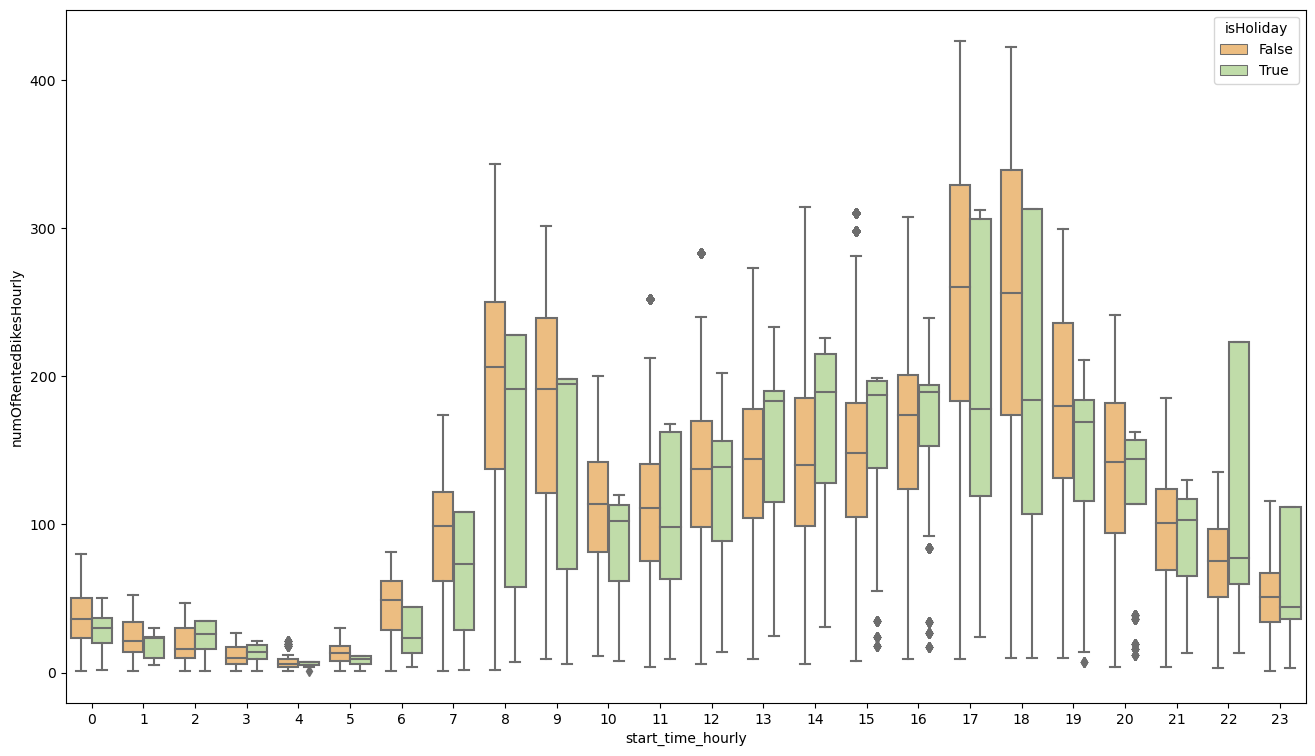

In [9]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isHoliday")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

ERKLÄRUNG AUCH FÜR Warum keine Unterschiede

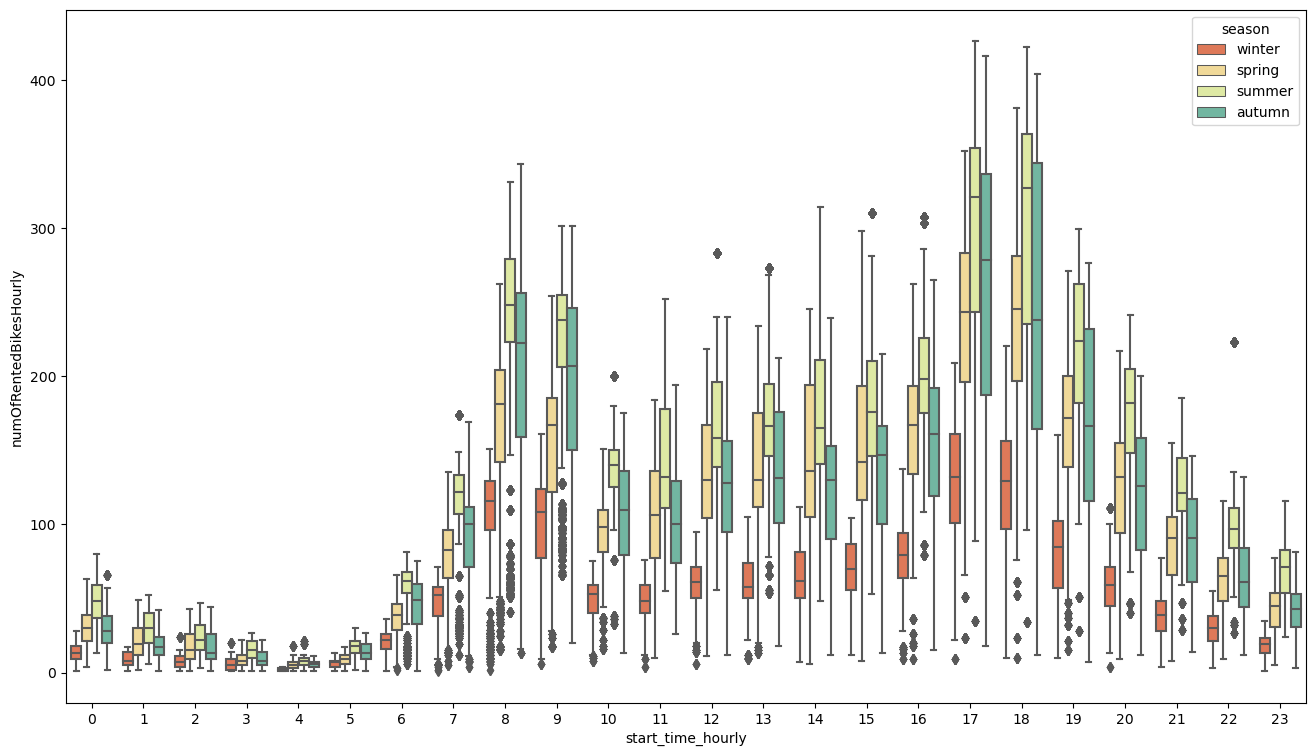

In [10]:
###### vielleicht Linien über mean
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="season")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- Nutzung ist über seasons über UHrzeit gleich, aber weniger im Winter

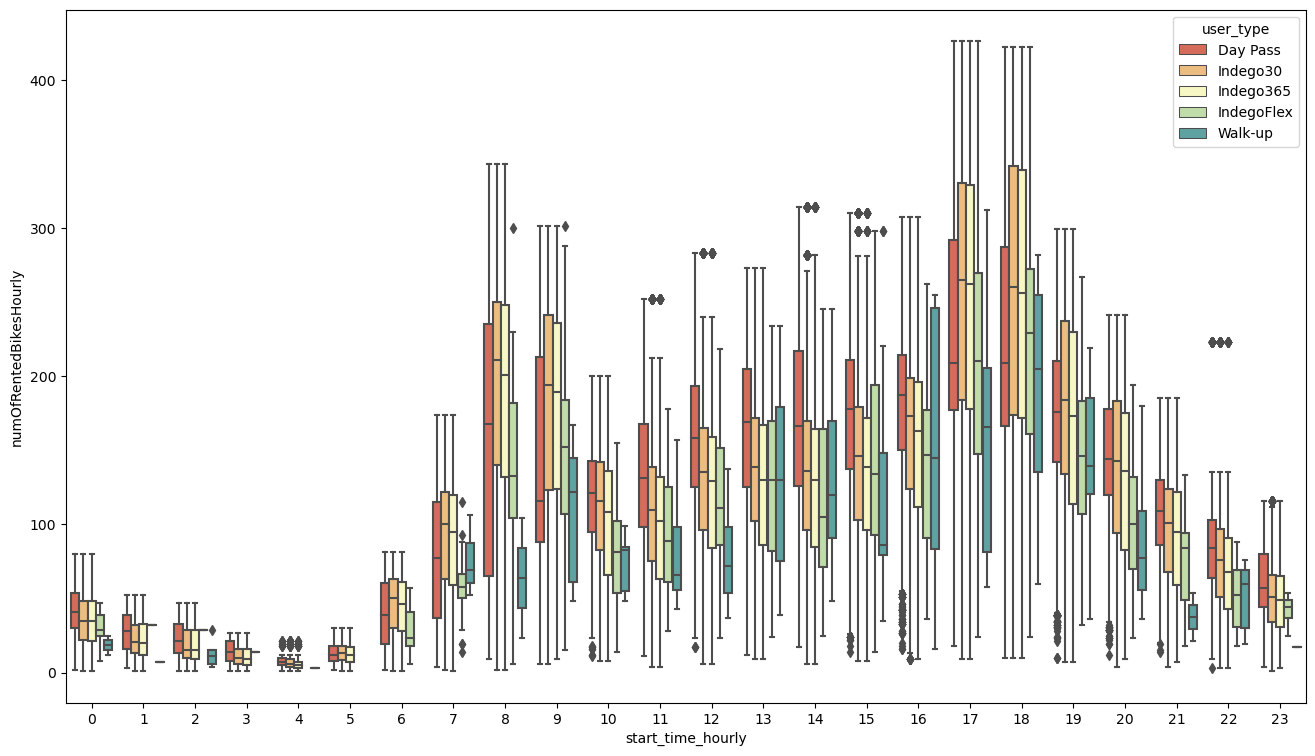

In [11]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="user_type", hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

Tarife erklären, z.b. Day Ticket um 8, weil Bahn weg

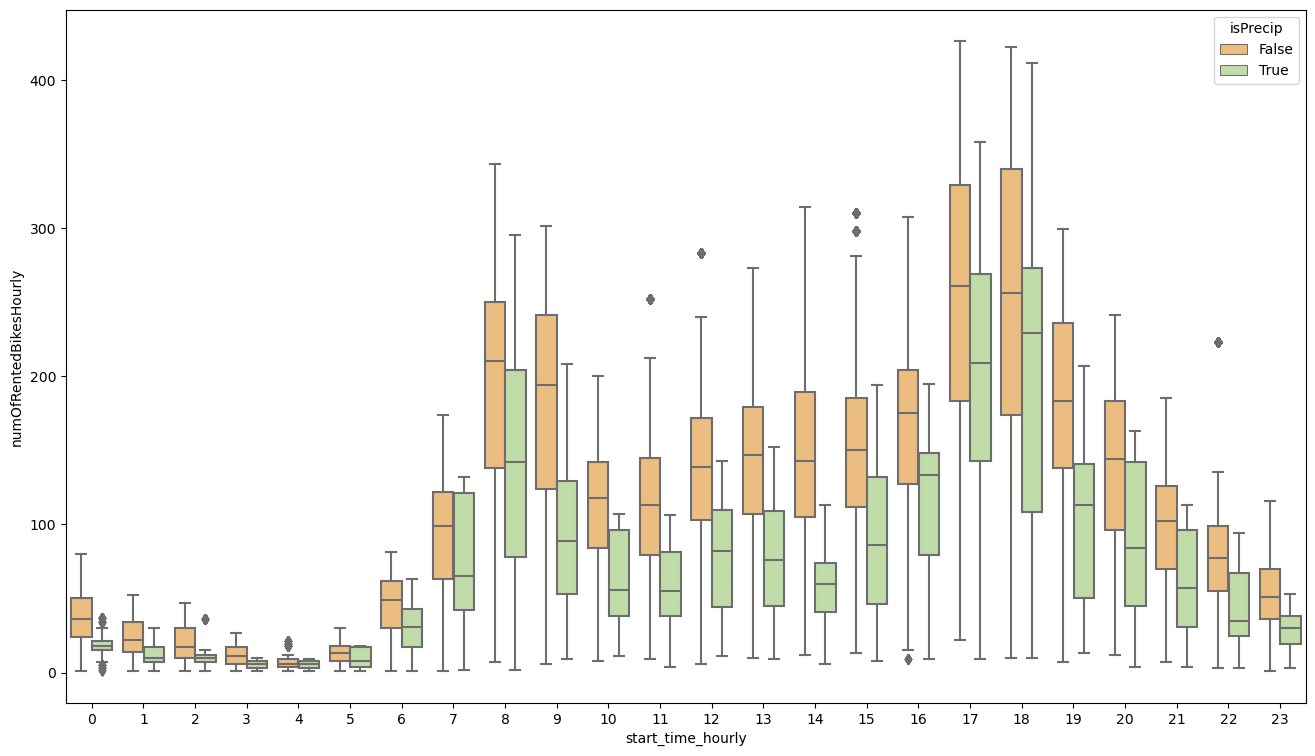

In [12]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isPrecip")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

ERKLÄRUNG

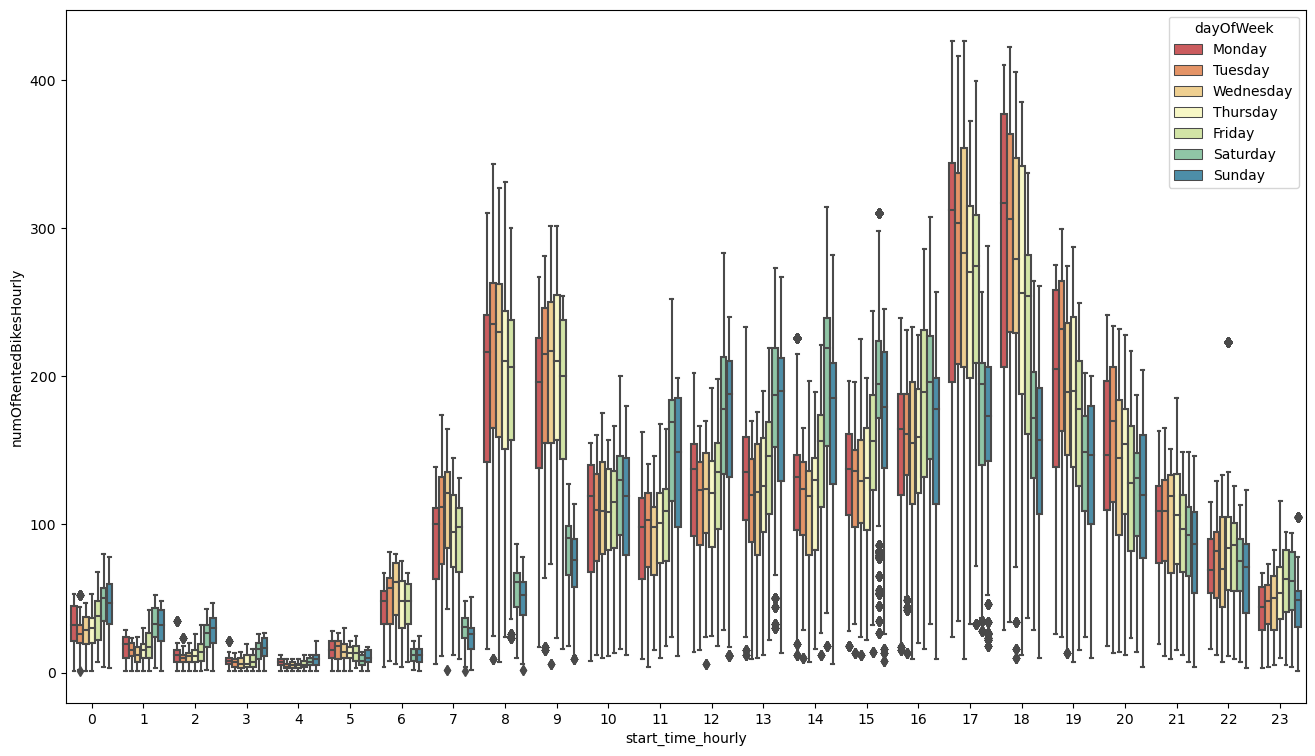

In [13]:
### ALS ÜBERSICHTLICHEN ABSCHLUSS + Überleitung zu Week
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette,hue="dayOfWeek",hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

NETTER TEXT

### 2.1.2 Fleet usage variety per week

In [14]:
# initialize new target_value y="numOfRentedBikesDaily"

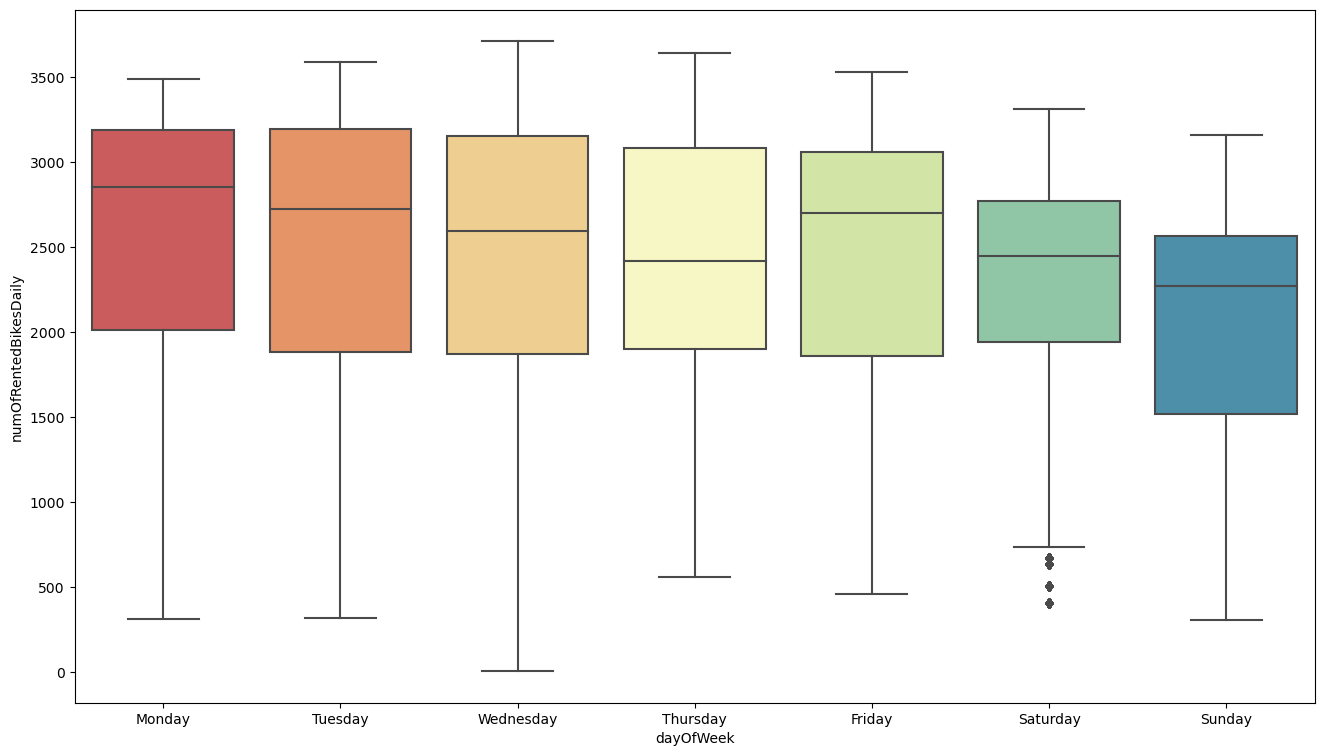

In [15]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- liegt vlt. am Abomodell

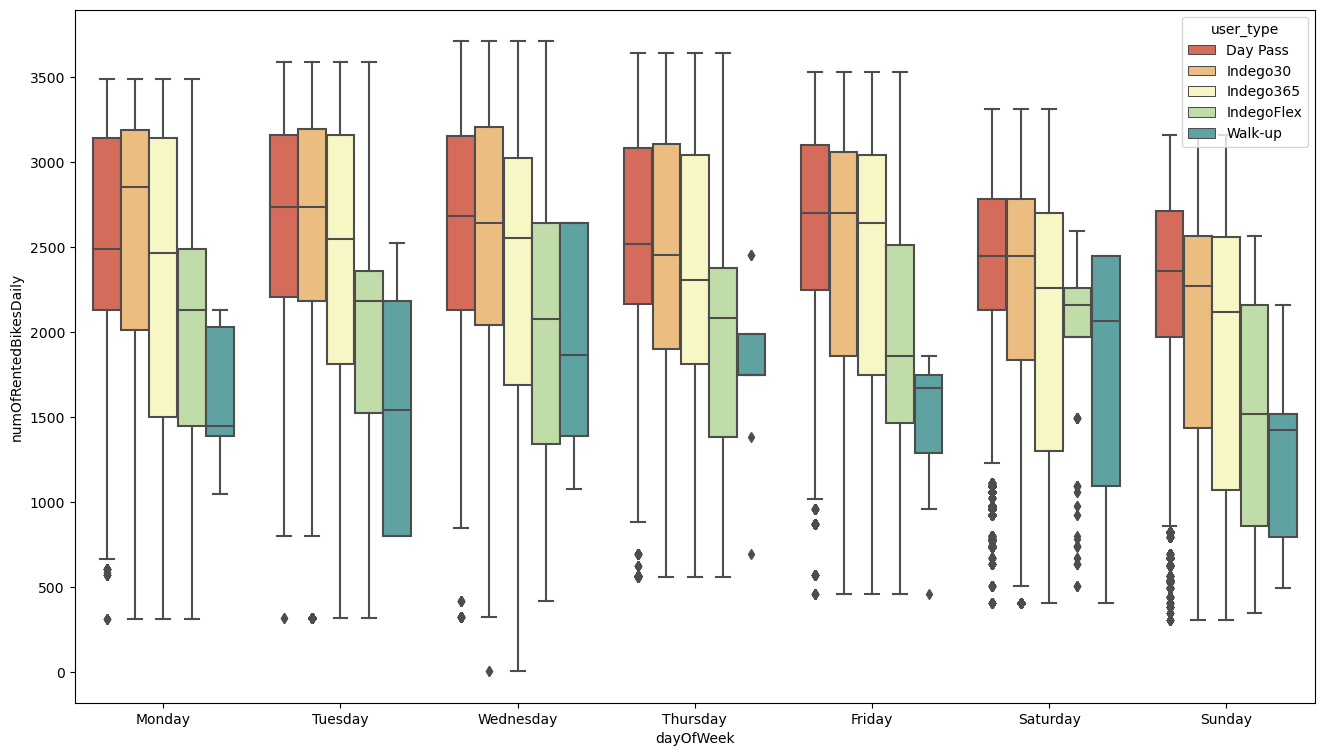

In [16]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="user_type",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

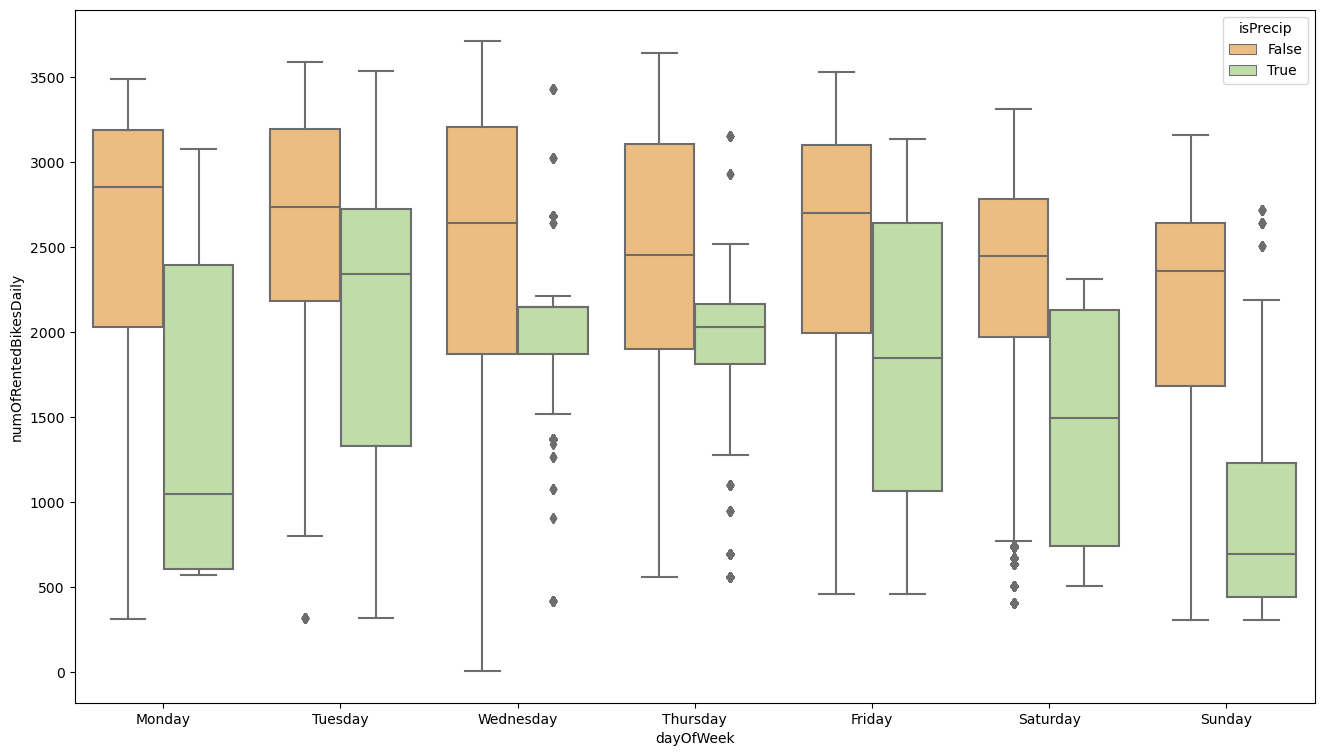

In [17]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="isPrecip",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [18]:
#SHOWOFF ORDER
#sns.boxplot(x="start_time_hourly",y="numOfRentedBikes",data=dfPhiladelphia,palette=palette,order=[22,23,0,1,2,3,4,5,6],hue="isWeekend")
#fig = plt.gcf()
#fig.set_size_inches(16, 9)
#plt.show()

### 2.1.2 Fleet usage variety during the year

In [19]:
dfPhiladelphia

,start_date,end_date,start_time_hourly,end_time_hourly,start_station_id,end_station_id,bike_id,start_latitude,start_longitude,end_latitude,...,tripduration_sec,numOfRentedBikesHourly,numOfRentedBikesDaily,numOfRentedBikesWeekly,numOfRentedBikesMonthly,numOfRentedBikesHourlyStationDependent,start_week,start_month,start_station_name,end_station_name
0,2019-01-01,2019-01-01,0,0,3049,3007,14495,39.94509,-75.142500,39.945170,...,480,2,797,7932,29696,1,1,1,Foglietta Plaza,"11th & Pine, Kahn Park"
1,2019-01-01,2019-01-01,0,1,3005,3007,5332,39.94733,-75.144030,39.945170,...,420,2,797,7932,29696,1,1,1,"Welcome Park, NPS","11th & Pine, Kahn Park"
2,2019-01-01,2019-01-01,1,1,3166,3169,14623,39.97195,-75.134450,39.953820,...,780,8,797,7932,29696,1,1,1,Frankford & Belgrade,2nd & Race
3,2019-01-01,2019-01-01,1,1,3058,3103,11706,39.96716,-75.170010,39.977139,...,540,8,797,7932,29696,1,1,1,20th & Fairmount,"27th & Master, Athletic Recreation Center"
4,2019-01-01,2019-01-01,1,1,3182,3028,11039,39.95081,-75.169530,39.940610,...,720,8,797,7932,29696,1,1,1,17th & Sansom,4th & Bainbridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733436,2019-12-31,2020-01-01,23,0,3192,3070,16508,39.96207,-75.141113,39.960620,...,2778,28,1189,7932,32990,1,1,12,2nd & Fairmount,"Spring Garden Station, MFL"
733437,2019-12-31,2020-01-01,23,0,3086,3025,3326,39.94019,-75.166910,39.937240,...,227,28,1189,7932,32990,1,1,12,Broad & Christian,11th & Washington
733438,2020-01-01,2020-01-01,0,0,3052,3068,14555,39.94732,-75.156950,39.935490,...,449,3,3,7932,29696,2,1,1,9th & Locust,Broad & Federal
733439,2020-01-01,2020-01-01,0,0,3182,3028,17805,39.95081,-75.169530,39.940610,...,527,3,3,7932,29696,1,1,1,17th & Sansom,4th & Bainbridge


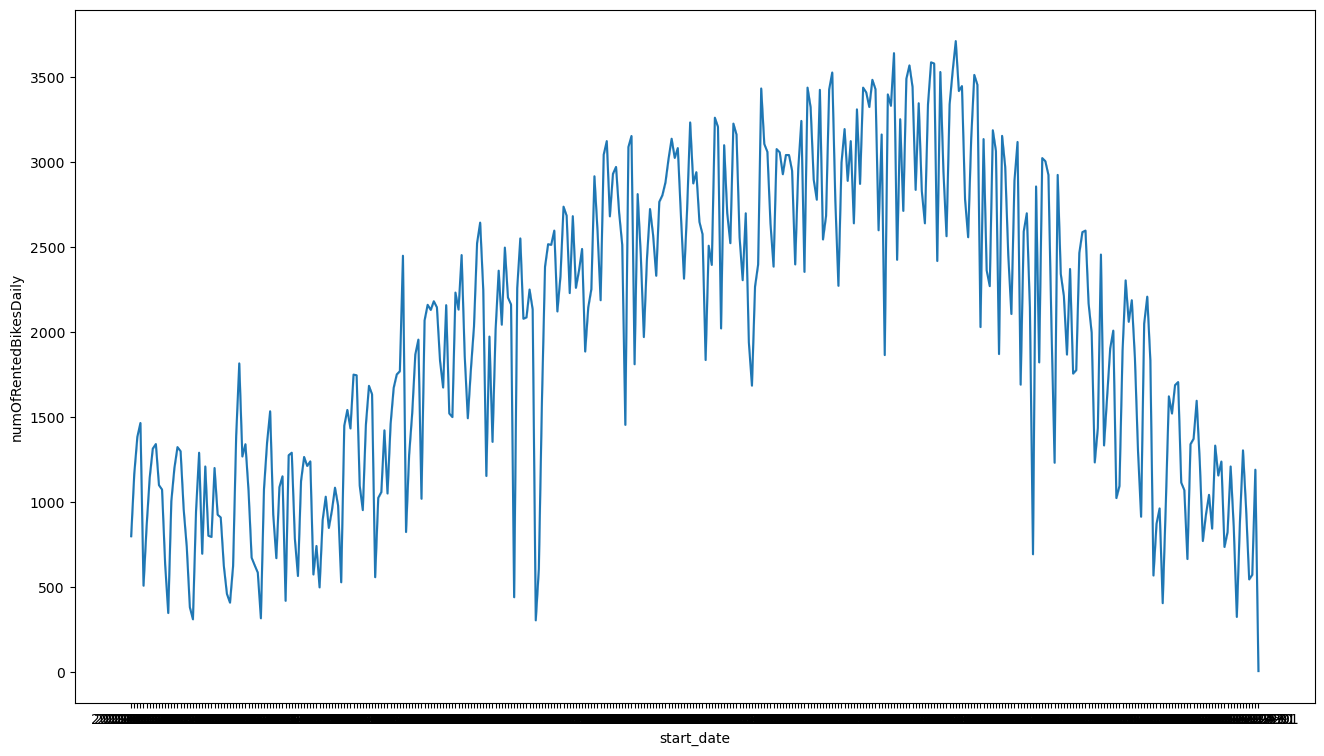

In [20]:
sns.lineplot(x="start_date",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

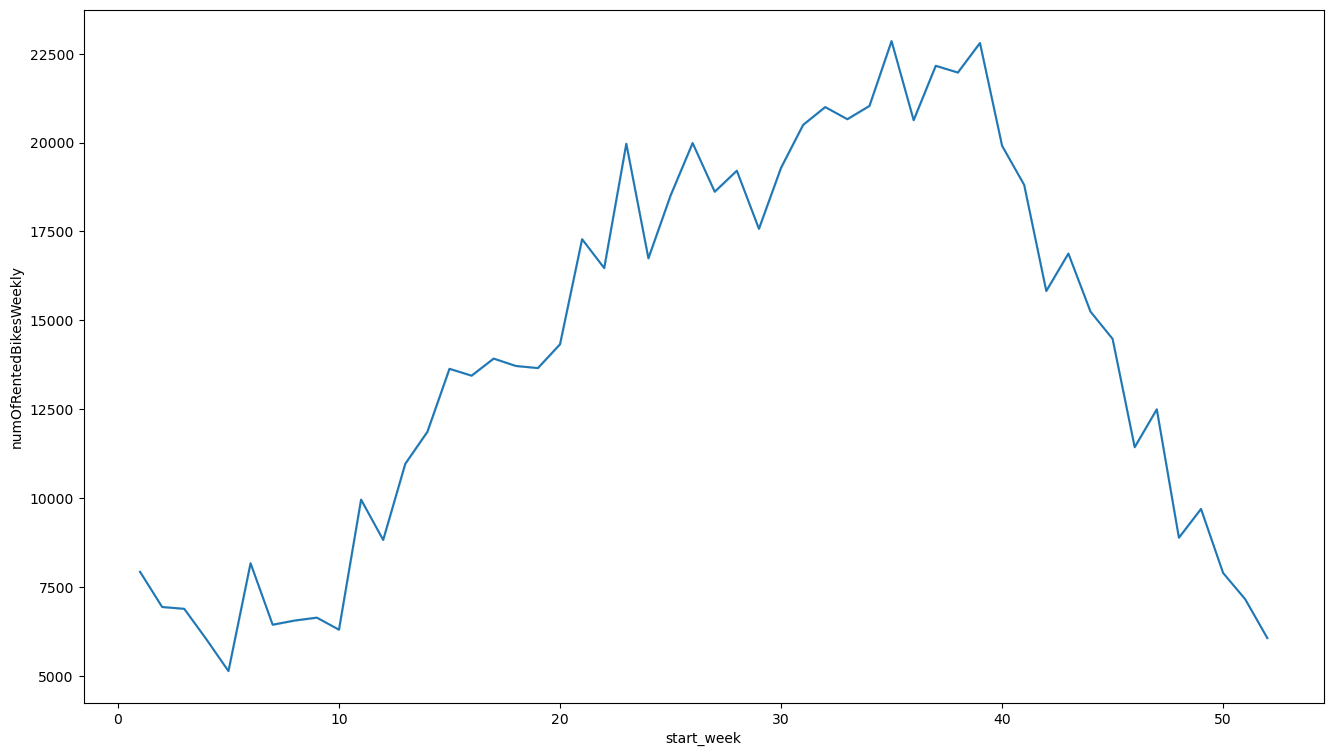

In [21]:
sns.lineplot(x="start_week",y="numOfRentedBikesWeekly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

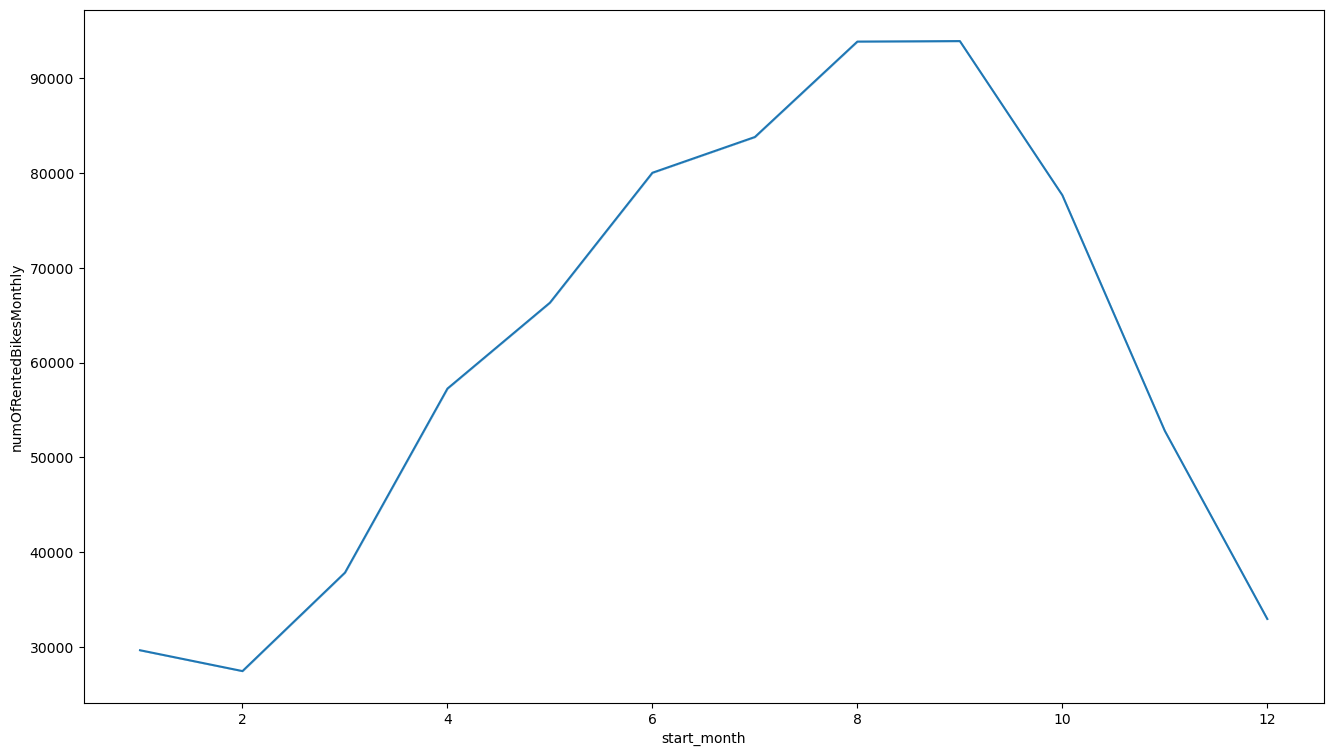

In [22]:
sns.lineplot(x="start_month",y="numOfRentedBikesMonthly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

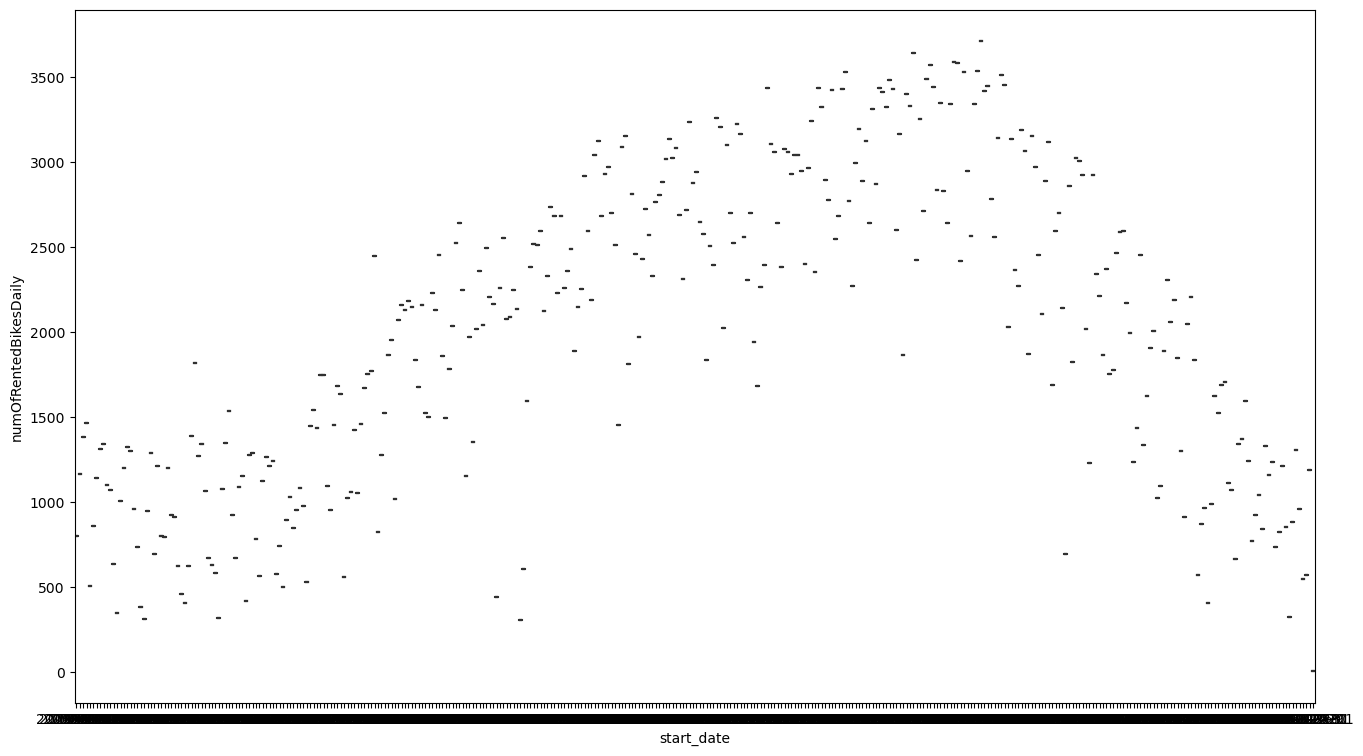

In [23]:
sns.boxplot(x="start_date",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [24]:
# Temperaturschwankungen & Bike usage

<AxesSubplot:xlabel='min_temp', ylabel='numOfRentedBikesDaily'>

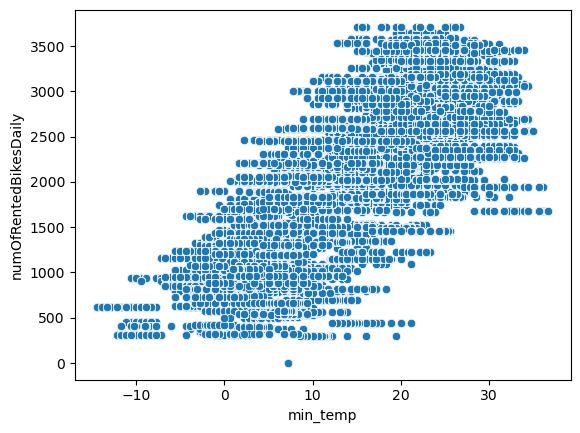

In [25]:
sns.scatterplot(x="min_temp",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)

## 2.2 Geographical Demand Patterns

In this section, we will:
- Which stations are particularly popular and which are not? 
- Provide a rationale as to why you observe these patterns.

### 2.2.1 Preparing Data

#### 2.2.1.1 Prepare Dataframe for All Station Locations

In [26]:
# definition to merge the latitude & longitude coordinates for one station in a single column
def mergeStartLocation(row):
    return (row["start_latitude"], row["start_longitude"])

def mergeEndLocation(row):
    return (row["end_latitude"],row["end_longitude"])

In [27]:
# dataframe with all unique stations and their coordinates
station_startLocations = pd.DataFrame(dfPhiladelphia, columns=['start_station_id', 'start_station_name', 'start_latitude', 'start_longitude'])
station_startLocations['startLocation'] = station_startLocations.apply(lambda row: mergeStartLocation(row), axis=1)
station_startLocations.drop_duplicates(inplace=True)
station_startLocations.sort_values(by=['start_station_id'], inplace=True)
station_startLocations.reset_index(drop=True, inplace=True)

# dataframe with all unique stations and their coordinates
station_endLocations = pd.DataFrame(dfPhiladelphia, columns=['end_station_id', 'end_station_name', 'end_latitude', 'end_longitude'])
station_endLocations['endLocation'] = station_endLocations.apply(lambda row: mergeEndLocation(row), axis=1)
station_endLocations.drop_duplicates(inplace=True)
station_endLocations.sort_values(by=['end_station_id'], inplace=True)
station_endLocations.reset_index(drop=True, inplace=True)

# test whether the start & end locations are the same 
if(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id'])):
    print(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id']), 
          ": The dataframes for start & end locations are equeal and thereore the end locations can be neglected.")
else:
    print(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id']), 
          ": Both Dataframes include different stations IDs and must be merged.")

True : The dataframes for start & end locations are equeal and thereore the end locations can be neglected.


In [28]:
# rename dataframe for all locations and column "start station id"
station_locations = station_startLocations
station_locations.rename(columns={"start_station_id": "station_id"}, inplace = True)
station_locations.rename(columns={"start_station_name": "station_name"}, inplace = True)
station_locations.rename(columns={"start_latitude": "latitude"}, inplace = True)
station_locations.rename(columns={"start_longitude": "longitude"}, inplace = True)
station_locations.rename(columns={"startLocation": "location"}, inplace = True)

*Note:* The dataframe station_locations only includes stations which have entries in dfPhiladelphia which means only stations with bike trips are taken into account. Maybe import dfStations from Task 1. 

#### 2.2.1.2 Preparing and Computing the Least & Most Popular Start / End Stations

In [29]:
# create a copied dataframe to further work with it
dfPhiladelphia_copy = dfPhiladelphia

# Firstly compute the most popular start stations in descending order
# accumulate the start stations ids 
start_stations = pd.DataFrame(dfPhiladelphia_copy, columns=['start_station_id', 'numOfRentedBikes']).fillna(1)

# count trips for every start station
start_stations = start_stations.groupby(['start_station_id'])['numOfRentedBikes'].count().reset_index()

# merge with station_location dataframe to enrich data with combined coordinates
start_stations = pd.merge(station_locations, start_stations, left_on="station_id", right_on="start_station_id", how="left")

# drop unneccessary column "start_station_id"
start_stations.drop(columns="start_station_id", inplace=True)

# sort in descending order
start_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
start_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_start"}, inplace = True)

In [30]:
# secondly compute the most popular end stations in descending order
# accumulate the start stations ids 
end_stations = pd.DataFrame(dfPhiladelphia_copy, columns=['end_station_id', 'numOfRentedBikes']).fillna(1)

# count trips for every start station
end_stations = end_stations.groupby(['end_station_id'])['numOfRentedBikes'].count().reset_index()

# merge with station_location dataframe to enrich data with combined coordinates
end_stations = pd.merge(station_locations, end_stations, left_on="station_id", right_on="end_station_id", how="left")

# drop unneccessary column "start_station_id"
end_stations.drop(columns="end_station_id", inplace=True)

# sort in descending order
end_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
end_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_end"}, inplace = True)

In [31]:
# Method for retrieving the top x interaction stations
# Compute sum of start and end, append all values of ending rentals to starting rentals 
# and then group by the station name and sum the counter values. Then sort and take the first x values.

# merge
combined_stations = pd.merge(start_stations, end_stations, left_on="station_id", right_on="station_id", how="left")

# rename columns
combined_stations.rename(columns={"station_name_x": "station_name"}, inplace = True)
combined_stations.rename(columns={"latitude_x": "latitude"}, inplace = True)
combined_stations.rename(columns={"longitude_x": "longitude"}, inplace = True)
combined_stations.rename(columns={"location_x": "location"}, inplace = True)

# add the number of rented bikes for each station 
combined_stations["numOfRentedBikes"] = combined_stations['numOfRentedBikes_start'] + combined_stations['numOfRentedBikes_end']

# drop unneccessary column 
combined_stations.drop(columns=['station_name_y', 'latitude_y', 'longitude_y', 'location_y'], inplace=True)

# sort in descending order
combined_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
combined_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_combined"}, inplace = True)

### 2.2.2 Plot the Data for Least & Most Popular Stations

#### 2.2.2.1 Visualization of Data for the Most Popular Stations in Philadelphia

In [50]:
# prepare dataframe combined_stations for plotting
popularity_stations = pd.DataFrame(combined_stations, columns=['station_name', 'numOfRentedBikes_start', 'numOfRentedBikes_end', 'numOfRentedBikes_combined'])

# set index to station name 
popularity_stations.set_index(['station_name'], inplace=True)

# Method to Plot the data
def plot_popularity_stations(popularity, x):
    if popularity == 'most popular':
        ax = popularity_stations.tail(x).plot(kind="barh", figsize=(60,40), fontsize=50, width=0.8)
        ax.set_xlabel('Number of rented bikes', fontsize=60)
        ax.set_ylabel('Station names', fontsize = 60)
        ax.set_title(label= str(x) + ' most popular starting stations', fontsize = 80)
        ax.legend(fontsize = 40)
    elif popularity == 'least popular':
        ax = popularity_stations.tail(x).plot(kind="barh", figsize=(60,40), fontsize=50, width=0.8)
        ax.set_xlabel('Number of rented bikes', fontsize=60)
        ax.set_ylabel('Station names', fontsize = 60)
        ax.set_title(label= str(x) + ' least popular starting stations', fontsize = 80)
        ax.legend(fontsize = 40)
    else:
        ax = 'Please define the popularity with either "most popular" or "least popular".'
    return ax

<AxesSubplot:title={'center':'20 most popular starting stations'}, xlabel='Number of rented bikes', ylabel='Station names'>

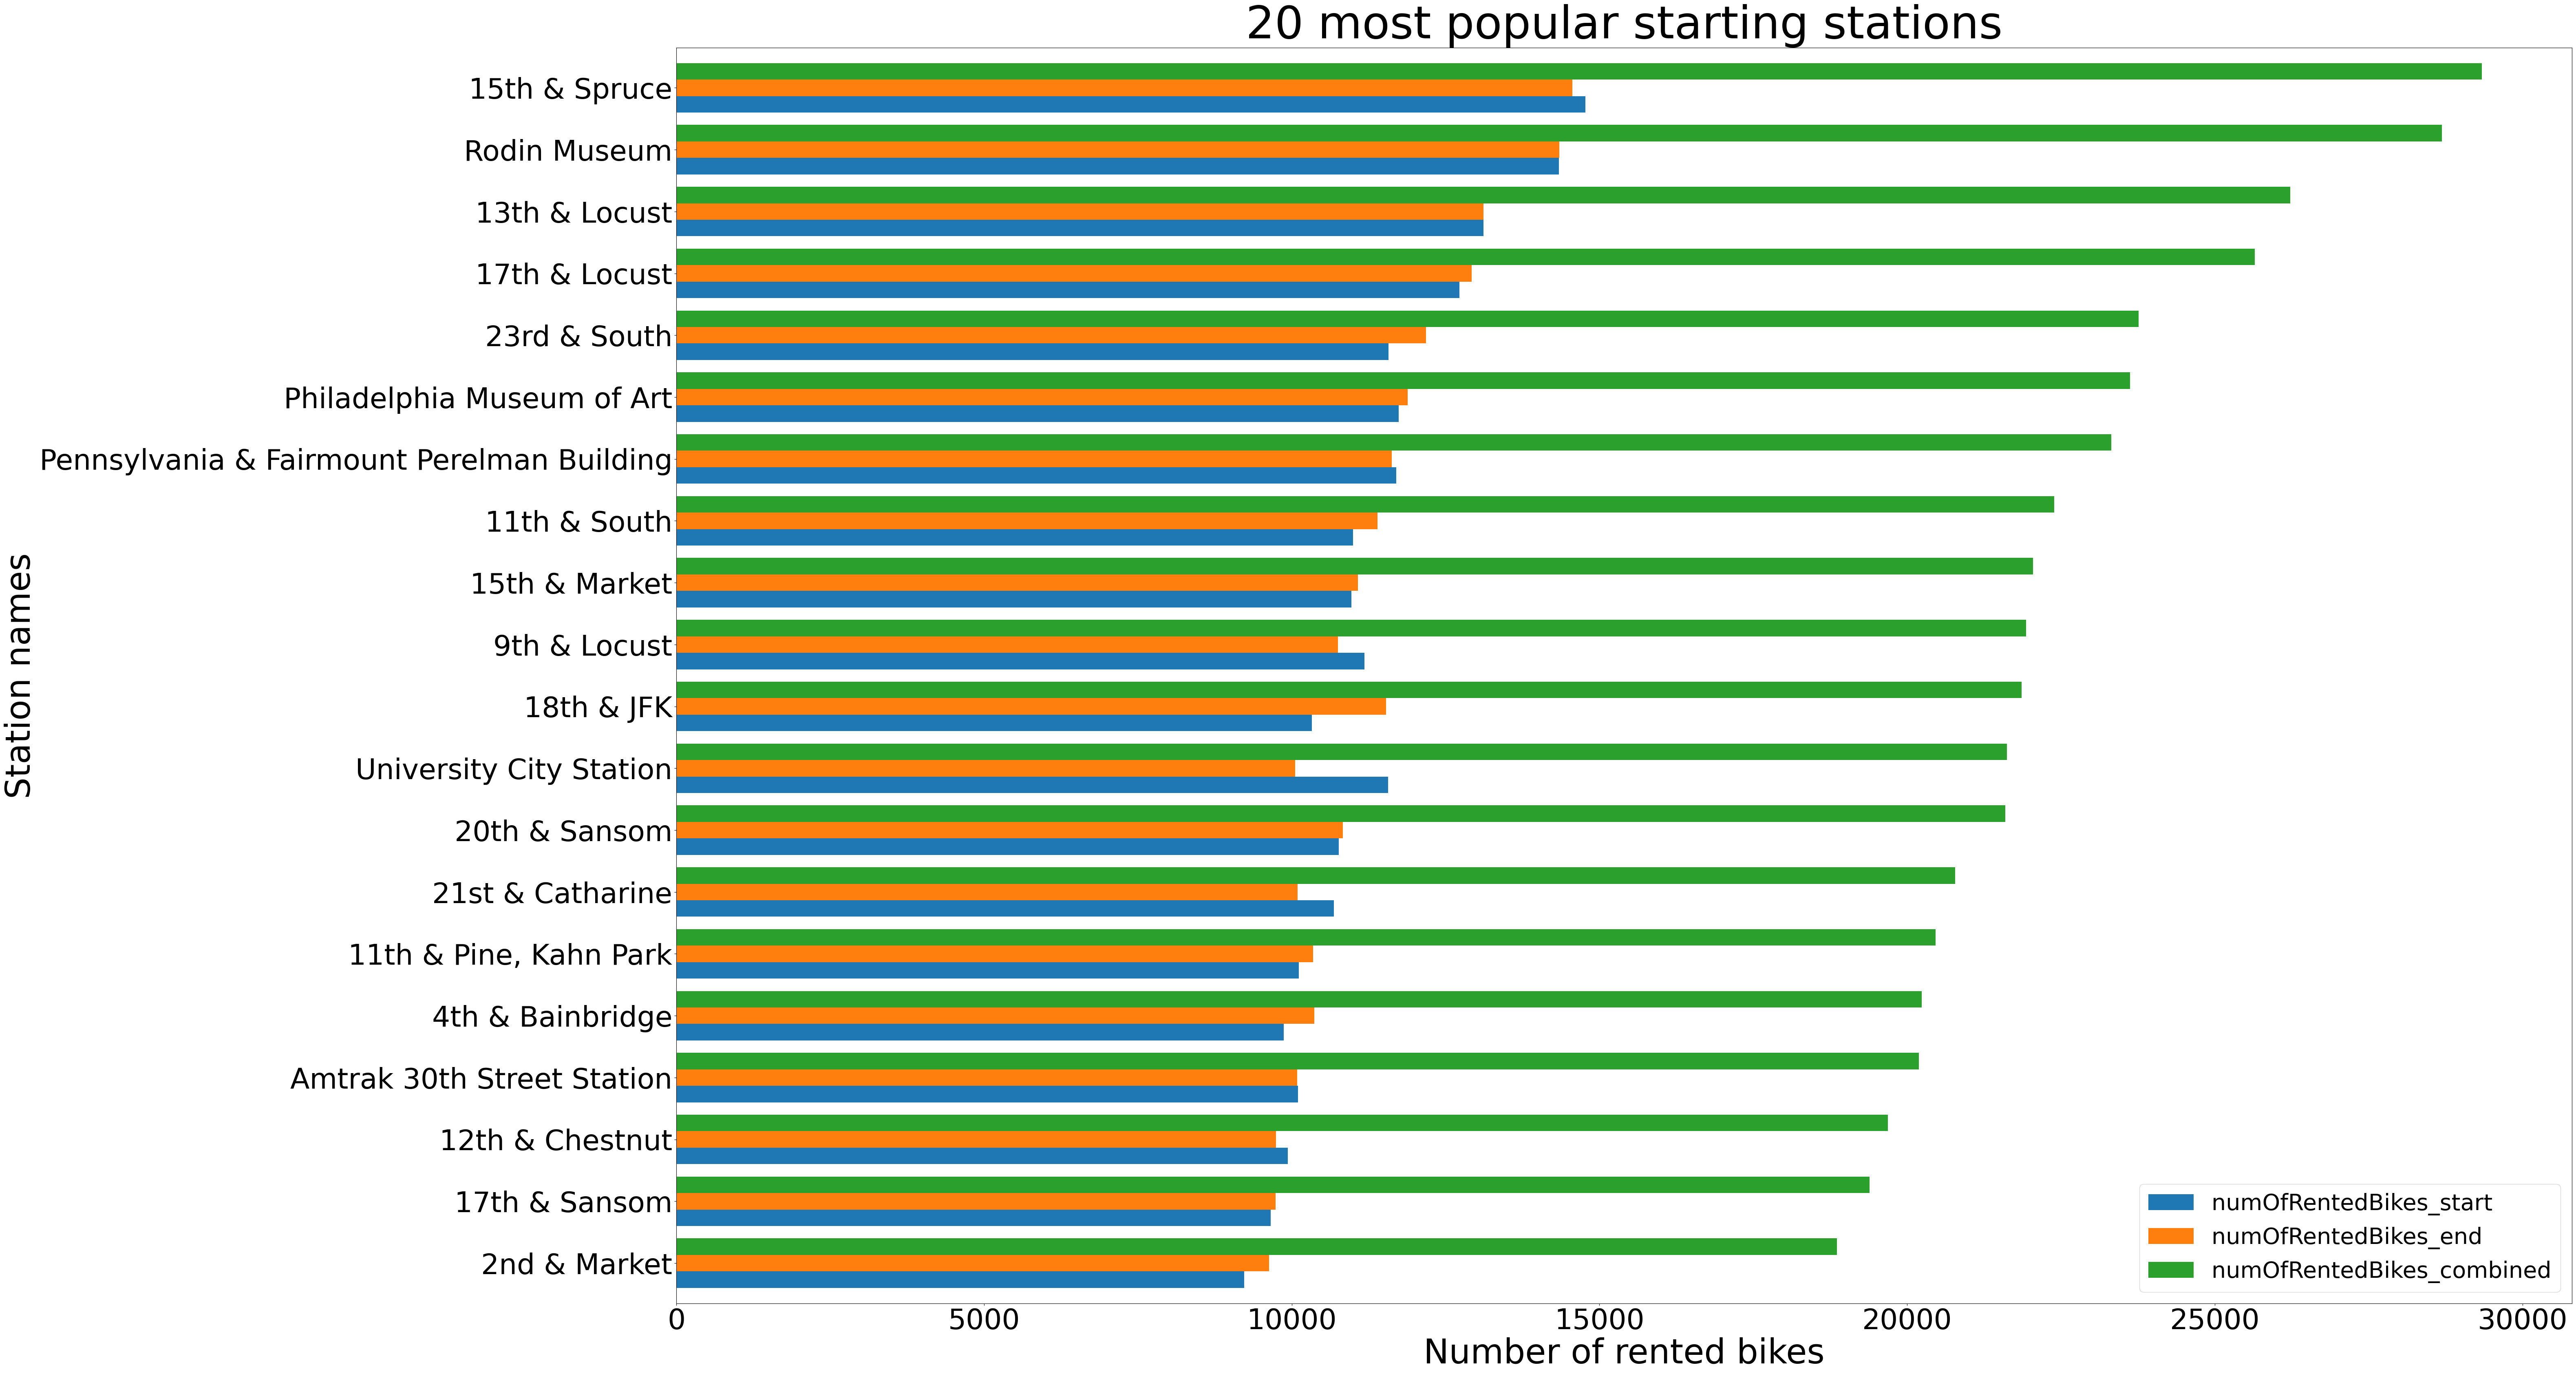

In [33]:
plot_popularity_stations('most popular', 20)

#### 2.2.2.2 Visualization of Data for the Least Popular Stations in Philadelphia

<AxesSubplot:title={'center':'20 least popular starting stations'}, xlabel='Number of rented bikes', ylabel='Station names'>

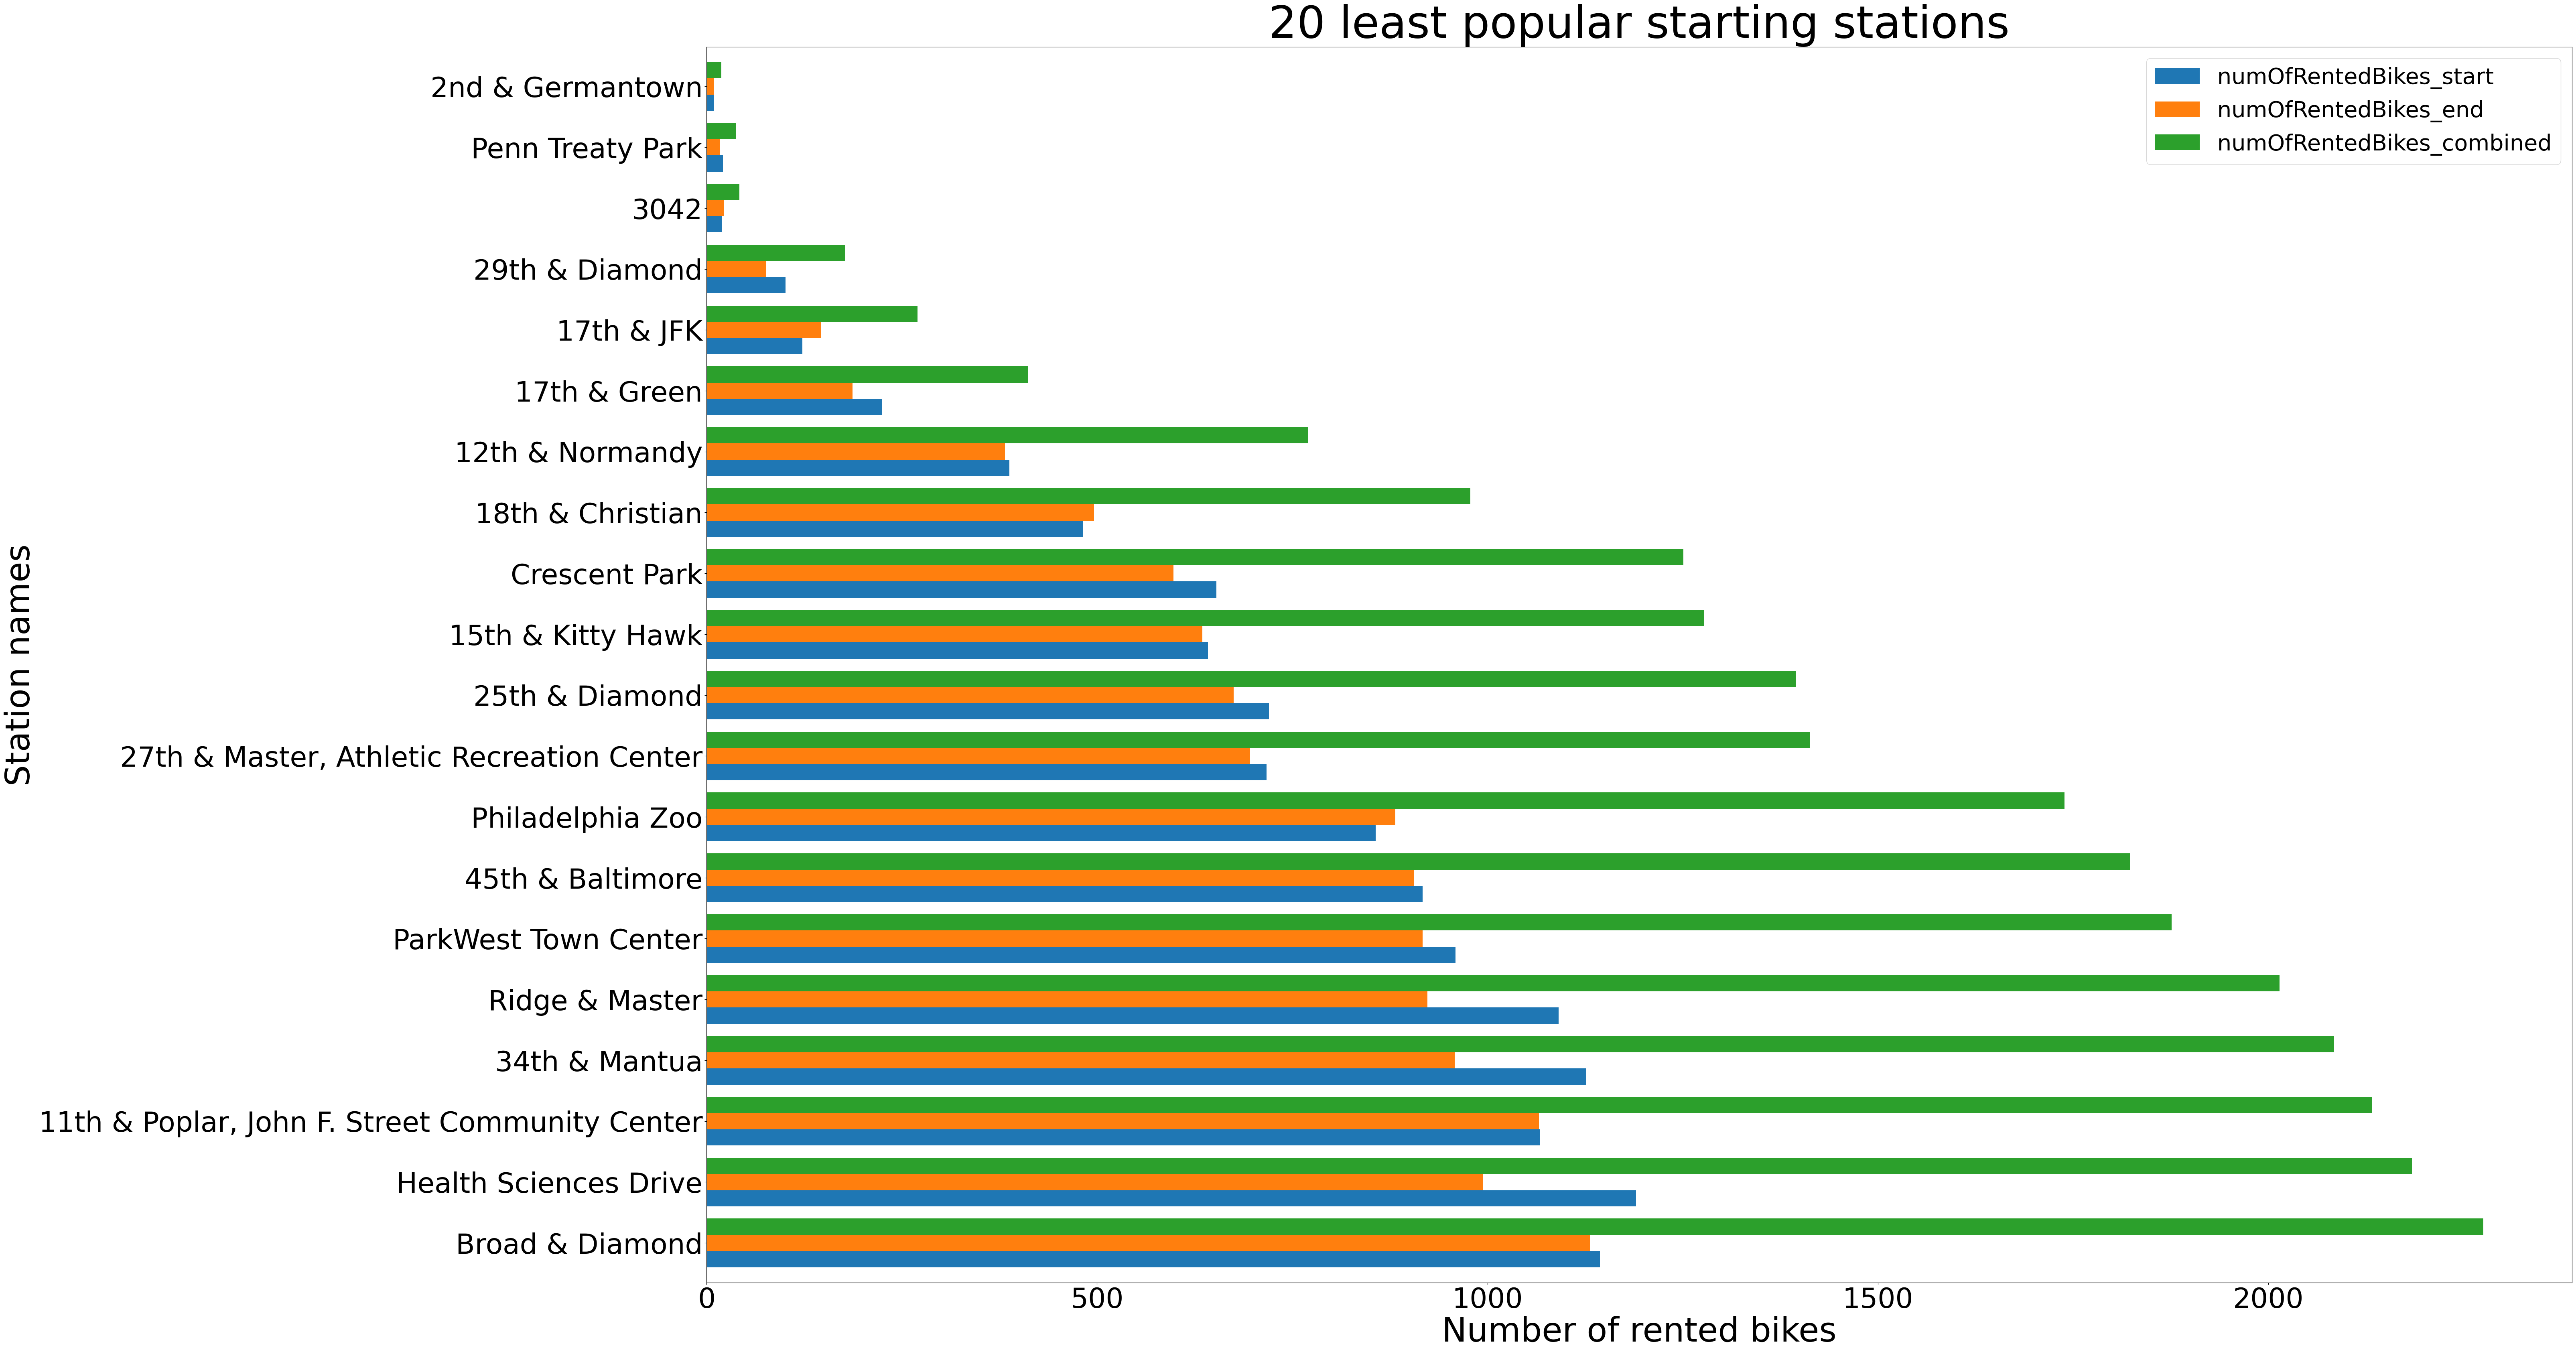

In [52]:
popularity_stations.sort_values(by=['numOfRentedBikes_combined'], ascending=False, inplace=True)

plot_popularity_stations('least popular', 20)

#### 2.2.2.3 Analysis of Distances of Popular Stations to City Center of Philadelphia

In order to put the most popular stations into context of Philadelphia, we calculate the distances from city center.

In [35]:
# coordinates for city center of Philadelphia 
city_center_philly = [39.9525839, -75.1652215]

In [36]:
# pip install geopy

In [37]:
import geopy.distance
# method
def measure_distance_station_point_of_interest(dataframe, point_of_interest):
    # parse the location to a list
    locations_list = dataframe['location'].to_list()
    
    #empty list for output
    distance_point_of_interest = []
    
    # compute the distances for each station to Philadelphia city center
    if point_of_interest == 'City Center':
        for i in range(0, len(locations_list)):
            distance_point_of_interest.append(geopy.distance.geodesic(city_center_philly, locations_list[i]).m)
    else:
        return "False Statement in Method"
    return distance_point_of_interest

In [38]:
df_distances = pd.DataFrame(combined_stations, columns=['station_id', 'station_name', 'location', 'numOfRentedBikes_combined'])
df_distances["dist_city_center"] = measure_distance_station_point_of_interest(combined_stations, 'City Center')
df_distances.sort_values(by=['dist_city_center'], ascending=True, inplace=True)

### 2.2.3 Geographical Visualization of Location Data

In [39]:
# import folium for map creation
import folium
from folium import plugins
from folium.plugins import HeatMap

#### 2.2.3.1 Visualization of Most & Least Popular Stations (Start & End Combined)

In [40]:
# Create a new map for Philadelphia
philadelphia = folium.Map(location=[station_locations.latitude.mean(), station_locations.longitude.mean()], zoom_start=12,
                          control_scale = True, tiles ='Stamen Toner')

In [53]:
# function to add markers to the map
def add_markers_to_map(df1, city_map, color):
    for i in df1.index.values:
        
        s1 = "Station:"
        s2 = str(combined_stations.iloc[i]['station_name'])
        s3 = "Rides:"
        s4 = str(combined_stations.iloc[i]['numOfRentedBikes_combined'])
        station_info = s1 + " " + s2 + " " + s3 + " " + s4 
        
        folium.CircleMarker(
                location=combined_stations.iloc[i]['location'],
                radius=1,
                weight=5,
                color=color,
                popup= station_info
               ).add_to(philadelphia)

In [42]:
# add markers for the remaining stations to map
add_markers_to_map(combined_stations.iloc[20:126], philadelphia, 'darkgrey')

# add markers for top 20 stations to map
add_markers_to_map(combined_stations.tail(20), philadelphia, 'lime')

# add markers for bottom 20 stations to map
add_markers_to_map(combined_stations.head(20), philadelphia, 'red')

In [55]:
#philadelphia

#### 2.2.3.2 Visualizing the Amount of Trips at each Station via Heatmaps 

In [44]:
phillyTrips = pd.DataFrame(dfPhiladelphia, columns=['start_station_id', 'end_station_id', 'bike_id', 'start_latitude',  'start_longitude', 'end_latitude', 'end_longitude'])
phillyTrips['startLocation'] = phillyTrips.apply(lambda row: mergeStartLocation(row), axis=1)
phillyTrips['endLocation'] = phillyTrips.apply(lambda row: mergeEndLocation(row), axis=1)

In [54]:
# store all coordinates (start & end) of every trip in a list for heatmap 
heat_data = phillyTrips['startLocation'].to_list()
heat_data = heat_data + phillyTrips['endLocation'].to_list()

# create new map
philadelphia_heatmap = philadelphia

# add a heatmap
philadelphia_heatmap = philadelphia_heatmap.add_child(plugins.HeatMap(heat_data, zoom_start=13, radius=20))
#philadelphia_heatmap

### 2.2.4 Summary and Observed Patterns of Data

In [57]:
combined_stations[['numOfRentedBikes_start', 'numOfRentedBikes_end','numOfRentedBikes_combined']].describe()

,numOfRentedBikes_start,numOfRentedBikes_end,numOfRentedBikes_combined
count,147.000000,147.000000,147.000000
mean,4989.394558,4989.394558,9978.789116
std,3436.325061,3468.367856,6893.522687
min,10.000000,9.000000,19.000000
25%,2263.500000,2214.500000,4417.500000
50%,4482.000000,4479.000000,8910.000000
75%,7214.500000,7221.500000,14464.500000
max,14775.000000,14561.000000,29336.000000


## 2.3 Key Performance Indicators (KPIs)

In this section, we will:
- Define at least (!) three KPIs that you would include in a dashboard for a fleet operators. These KPIs must provide an immediate overview of the current fleet operations and how well the fleet is doing in terms of **utilization**, **revenue**, **coverage** and/or **other business-related aspects**. 
- Briefly explain the rationale behind selecting each KPI, explain why you have chosen it and where needed provide references.
- Calculate hourly values for the selected
- KPIs for the city/year in your dataset and visualize them over time. Which trends do you observe? How do you explain them?

### 2.3.1 KPI: `Utilization`

### 2.3.2 KPI: `Revenue`

### 2.3.3 KPI: `Coverage`

### 2.3.4 KPI: `...`

### 2.3.5 KPI: `...`

### 2.3.6 Dashboard

In [47]:
#sns.pairplot(tips, 
#             hue="sex", palette="magma",diag_kind ='kde', )
#plt.show()